In [1]:
import pandas as pd
import numpy as np

In [2]:
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"

In [3]:
data=pd.read_csv(url) 

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing

In [8]:
df=data[["Fare","Age"]]

In [9]:
df

,Fare,Age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0
...,...,...
886,13.0000,27.0
887,30.0000,19.0
888,23.4500,NaN
889,30.0000,26.0


In [10]:
min(df.Fare)

0.0

In [11]:
max(df.Fare)

512.3292

In [12]:
df.isnull().sum()

Fare      0
Age     177
dtype: int64

In [14]:
df.shape

(891, 2)

In [15]:
df=df.dropna()

In [16]:
df

,Fare,Age
0,7.2500,22.0
1,71.2833,38.0
2,7.9250,26.0
3,53.1000,35.0
4,8.0500,35.0
...,...,...
885,29.1250,39.0
886,13.0000,27.0
887,30.0000,19.0
889,30.0000,26.0


### Min- Max Scaling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [22]:
scaler = MinMaxScaler(feature_range=(0,5))

scaler.fit(df) #Compute the minimum and maximum to be used for later scaling.

MinMaxScaler()

In [33]:
df_minmax=scaler.transform(df) #Scale features of X according to feature_range.

In [25]:
df_minmax

array([[0.01415106, 0.27117366],
       [0.13913574, 0.4722292 ],
       [0.01546857, 0.32143755],
       ...,
       [0.0585561 , 0.23347575],
       [0.0585561 , 0.32143755],
       [0.01512699, 0.39683338]])

In [53]:
df_min=pd.DataFrame(df_minmax,columns=["Fare","Age"])

In [54]:
df_min.head()

,Fare,Age
0,0.070755,1.355868
1,0.695679,2.361146
2,0.077343,1.607188
3,0.518221,2.172656
4,0.078563,2.172656


In [30]:
df.describe()

,Fare,Age
count,714.000000,714.000000
mean,34.694514,29.699118
std,52.918930,14.526497
min,0.000000,0.420000
25%,8.050000,20.125000
50%,15.741700,28.000000
75%,33.375000,38.000000
max,512.329200,80.000000


In [55]:
df_min.describe()

,Fare,Age
count,714.000000,714.000000
mean,0.338596,1.839603
std,0.516454,0.912698
min,0.000000,0.000000
25%,0.078563,1.238062
50%,0.153629,1.732847
75%,0.325718,2.361146
max,5.000000,5.000000


In [32]:
# min max is maximum time use for image scaling

In [36]:
scaler5 = MinMaxScaler(feature_range=(0,5))
scaler5.fit(df)

MinMaxScaler(feature_range=(0, 5))

In [39]:
df_minmax5=scaler5.transform(df) 

In [41]:
df_minmax5

array([[0.07075529, 1.35586831],
       [0.69567868, 2.36114602],
       [0.07734285, 1.60718774],
       ...,
       [0.2927805 , 1.16737874],
       [0.2927805 , 1.60718774],
       [0.07563496, 1.98416688]])

In [56]:
df_max=pd.DataFrame(df_minmax5,columns=["Fare","Age"])

In [57]:
df_max.head()

,Fare,Age
0,0.070755,1.355868
1,0.695679,2.361146
2,0.077343,1.607188
3,0.518221,2.172656
4,0.078563,2.172656


In [43]:
import seaborn as sns

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

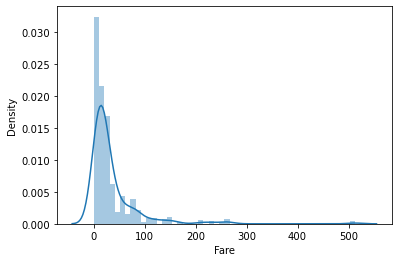

In [44]:
sns.distplot(df["Fare"])

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

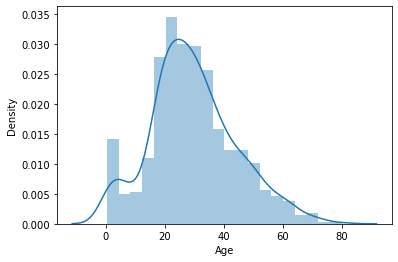

In [45]:
sns.distplot(df["Age"])

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

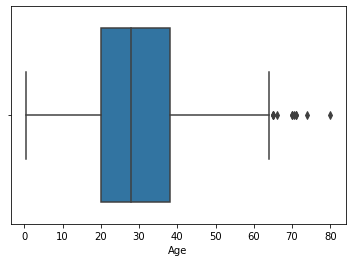

In [46]:
sns.boxplot(df["Age"])

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

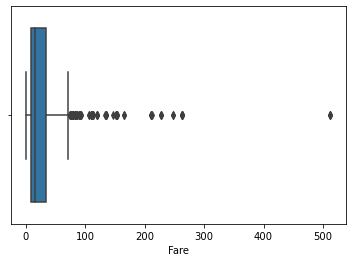

In [47]:
sns.boxplot(df["Fare"])

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fare'>

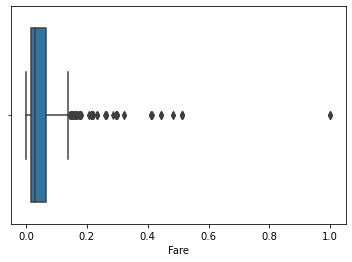

In [49]:
sns.boxplot(df1["Fare"])

C:\Users\sony\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

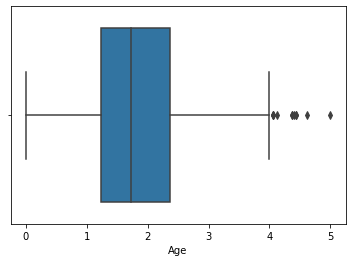

In [52]:
sns.boxplot(df1["Age"])

In [58]:
from sklearn.preprocessing import StandardScaler

In [59]:
scaler = StandardScaler()

In [61]:
scaler.fit(df)

StandardScaler()

In [62]:
scaler.transform(df)

array([[-0.51897787, -0.53037664],
       [ 0.69189675,  0.57183099],
       [-0.50621356, -0.25482473],
       ...,
       [-0.08877362, -0.73704057],
       [-0.08877362, -0.25482473],
       [-0.50952283,  0.15850313]])

In [70]:
stand=pd.DataFrame(scaler.transform(df),columns=["Fare","Age"])

In [74]:
stand.head()

,Fare,Age
0,-0.518978,-0.530377
1,0.691897,0.571831
2,-0.506214,-0.254825
3,0.348049,0.365167
4,-0.503850,0.365167


In [72]:
stand.describe()

,Fare,Age
count,7.140000e+02,7.140000e+02
mean,-5.022437e-17,2.174187e-16
std,1.000701e+00,1.000701e+00
min,-6.560759e-01,-2.016979e+00
25%,-5.038498e-01,-6.595416e-01
50%,-3.583992e-01,-1.170488e-01
75%,-2.495211e-02,5.718310e-01
max,9.032109e+00,3.465126e+00


In [73]:
stand.mean()

Fare   -5.022437e-17
Age     2.174187e-16
dtype: float64

In [75]:
stand.std()

Fare    1.000701
Age     1.000701
dtype: float64

In [76]:
stand.var()

Fare    1.001403
Age     1.001403
dtype: float64

<AxesSubplot:>

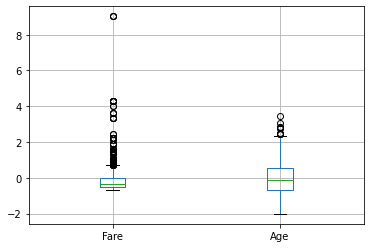

In [77]:
stand.boxplot()

<AxesSubplot:>

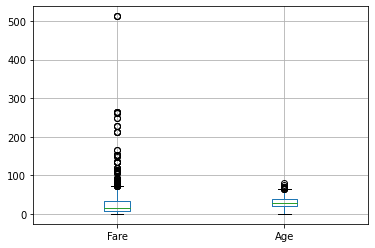

In [78]:
df.boxplot()

In [79]:
from sklearn.preprocessing import RobustScaler

In [80]:
transformer = RobustScaler().fit(df)

In [81]:
transformer.transform(df)

array([[-0.33530898, -0.33566434],
       [ 2.19315301,  0.55944056],
       [-0.30865548, -0.11188811],
       ...,
       [ 0.56301283, -0.5034965 ],
       [ 0.56301283, -0.11188811],
       [-0.31556565,  0.22377622]])

In [82]:
trans=pd.DataFrame(transformer.transform(df),columns=["Fare","Age"])

In [83]:
trans.head()

,Fare,Age
0,-0.335309,-0.335664
1,2.193153,0.559441
2,-0.308655,-0.111888
3,1.475155,0.391608
4,-0.303720,0.391608


<AxesSubplot:>

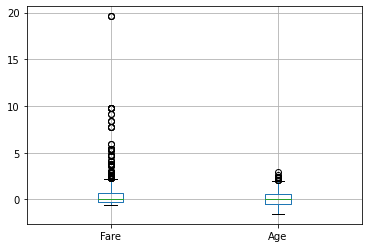

In [84]:
trans.boxplot()

In [85]:
trans.describe()

,Fare,Age
count,714.000000,714.000000
mean,0.748384,0.095056
std,2.089592,0.812671
min,-0.621587,-1.542937
25%,-0.303720,-0.440559
50%,0.000000,0.000000
75%,0.696280,0.559441
max,19.608588,2.909091


In [86]:
import numpy as np
np.log(df)

,Fare,Age
0,1.981001,3.091042
1,4.266662,3.637586
2,2.070022,3.258097
3,3.972177,3.555348
4,2.085672,3.555348
...,...,...
885,3.371597,3.663562
886,2.564949,3.295837
887,3.401197,2.944439
889,3.401197,3.258097


<AxesSubplot:>

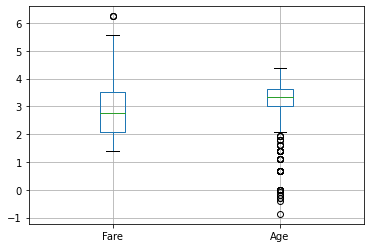

In [87]:
np.log(df).boxplot()

In [ ]:
Absolute Maximum Scaling
Min-Max Scaling
Normalization
Standardization
Robust Scaling